In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

In [77]:
path = '../../../../data/'

In [100]:
df = pd.read_csv(f'{path}final_data/comparison_of_phyloP_and_rule.csv')
df.columns = [i.strip() for i in df.columns]
df['CHROM'] = df['CHROM'].str.strip()
df.head()

,CHROM,two_evolved,two_all,inno_evolved,inno_all,noninno_evolved,noninno_all
0,NC_044211.2,1388,1391,1605,1606,1188,1191
1,NC_044212.2,850,851,931,933,770,770
2,NC_044213.2,1726,1732,2044,2048,1476,1481
3,NC_044214.2,1339,1340,1523,1524,1145,1146
4,NC_044215.2,821,821,955,957,737,737


In [182]:
df.sum()

CHROM              NC_044211.2NC_044212.2NC_044213.2NC_044214.2NC...
two_evolved                                                    12199
two_all                                                        12267
inno_evolved                                                   13551
inno_all                                                       13632
noninno_evolved                                                10598
noninno_all                                                    10661
dtype: object

In [101]:
chrom = pd.read_csv(f'{path}stage1/chrom_len.tsv', 
                    sep = '\t')
chrom  = chrom.iloc[1:][['chrom', 'Molecule']].rename(columns = {'chrom':'CHROM'})
chrom.head()

,CHROM,Molecule
1,NC_044211.2,Chromosome 1
2,NC_044212.2,Chromosome 1A
3,NC_044213.2,Chromosome 2
4,NC_044214.2,Chromosome 3
5,NC_044215.2,Chromosome 4


In [167]:
df_full = df.merge(chrom, on = 'CHROM')
df_full = df_full.rename(columns = {'Molecule':'Chromosome'})
df_full.head()
#df_full['Chromosome'].apply(lambda x: x[])

,CHROM,two_evolved,two_all,inno_evolved,inno_all,noninno_evolved,noninno_all,Chromosome
0,NC_044211.2,1388,1391,1605,1606,1188,1191,Chromosome 1
1,NC_044212.2,850,851,931,933,770,770,Chromosome 1A
2,NC_044213.2,1726,1732,2044,2048,1476,1481,Chromosome 2
3,NC_044214.2,1339,1340,1523,1524,1145,1146,Chromosome 3
4,NC_044215.2,821,821,955,957,737,737,Chromosome 4


In [168]:
inno_list = ['two', 'inno','noninno']

i = 0
df1 = pd.melt(df_full, id_vars='Chromosome', value_vars=[f'{inno_list[i]}_evolved',f'{inno_list[i]}_all'])
data_sorted = df1.sort_values(by = 'value',
                              ascending = False)

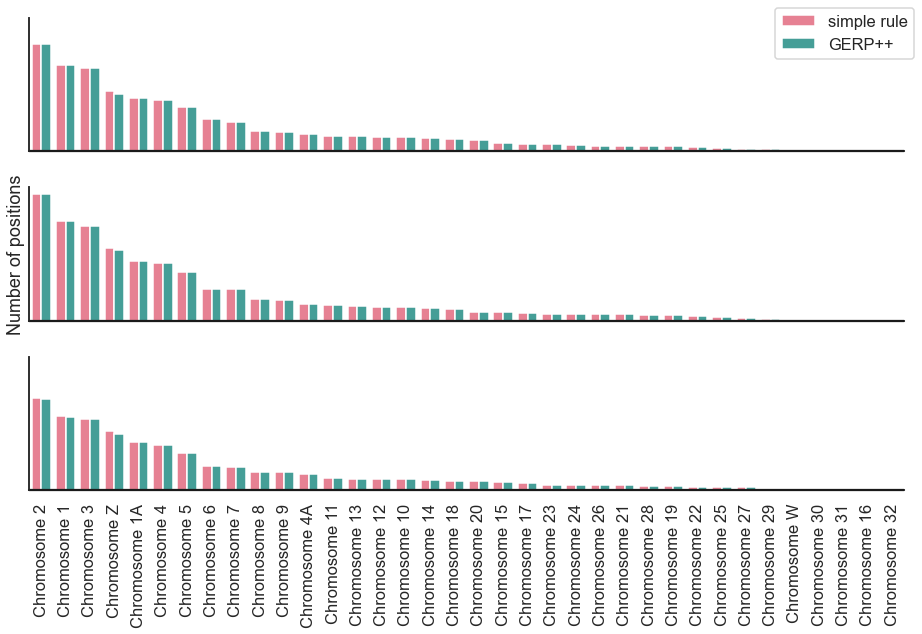

In [180]:
inno_list = ['two', 'inno','noninno']

sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, axs = plt.subplots(3, 1, figsize=(13, 9), 
                      sharex=True,
                      sharey=True)


for i in range(3):
    df1 = pd.melt(df_full, id_vars='Chromosome', value_vars=[f'{inno_list[i]}_evolved',f'{inno_list[i]}_all'])
    data_sorted = df1.sort_values(by = 'value',
                              ascending = False)
    sns.barplot(data = data_sorted,
                y ='value', 
                x ='Chromosome', 
                hue = 'variable', 
                palette="husl",
                ax = axs[i],
                )
    axs[i].legend_.remove()

    axs[i].set_xlabel("")
    if i==1:
        axs[i].set_ylabel("Number of positions")
    else:
        axs[i].set_ylabel("")
    axs[i].axhline(0, color="k", clip_on=False)
    
handles, labels = axs[2].get_legend_handles_labels()
labels = ['simple rule', 'GERP++']
f.legend(handles, labels, loc='upper right')

plt.xticks(rotation=90)
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [171]:
labels

['noninno_all', 'noninno_evolved']

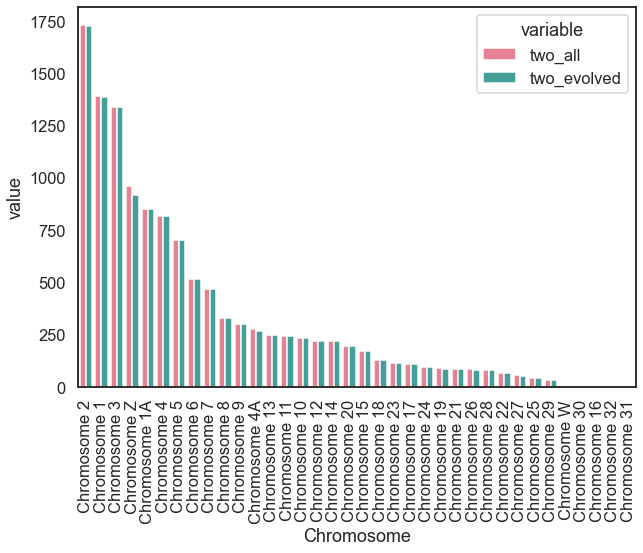

In [146]:
plt.figure(figsize = (10,7))
sns.barplot(data = data_sorted,
            y ='value', 
            x ='Chromosome', 
            hue = 'variable', 
            palette="husl")
plt.xticks(rotation=90)
plt.show()

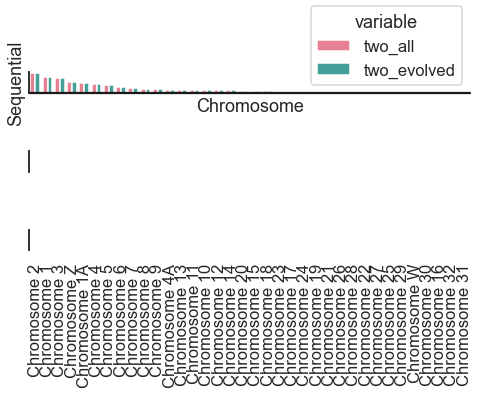

In [141]:
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

sns.barplot(data = data_sorted,
            y ='value', 
            x ='Chromosome', 
            hue = 'variable', 
            palette="husl",
            ax = ax1)

ax1.set_ylabel("Sequential")
ax1.axhline(0, color="k", clip_on=False)
plt.xticks(rotation=90)
#ax1.axhline(0, color="k", clip_on=False)

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

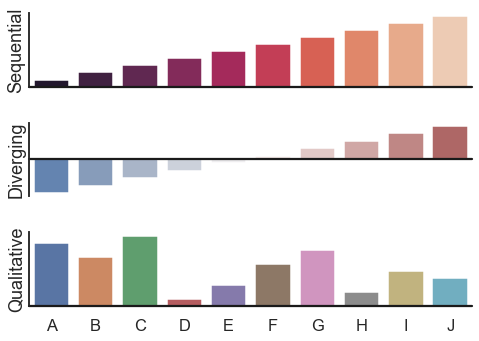

In [140]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

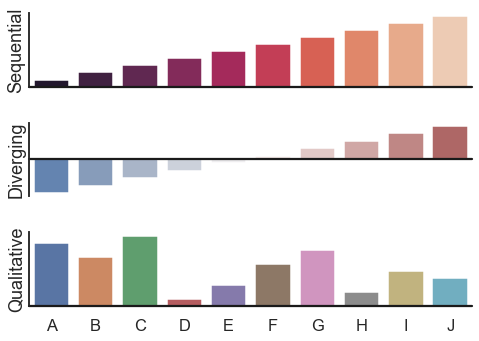

In [72]:
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

sns.barplot(data = data_sorted,
            y ='value', 
            x ='Chromosome', 
            hue = 'variable', 
            palette="husl",
            ax = ax1)
ax1.xticks(rotation=90)
plt.show()
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [25]:
df

,CHROM,two_evolved,two_all,inno_evolved,inno_all,noninno_evolved,noninno_all
0,NC_044211.2,1388,1391,1605,1606,1188,1191
1,NC_044212.2,850,851,931,933,770,770
2,NC_044213.2,1726,1732,2044,2048,1476,1481
3,NC_044214.2,1339,1340,1523,1524,1145,1146
4,NC_044215.2,821,821,955,957,737,737
5,NC_044216.2,271,278,265,272,262,269
6,NC_044217.2,706,706,790,792,595,595
7,NC_044218.2,516,516,508,509,392,392
8,NC_044219.2,468,468,512,512,372,373
9,NC_044220.2,332,333,357,357,294,294
